### Indian Institute of Information Technology Raichur

**Name:** K. V. Jaya Harsha  
**Roll No:** CS23B1034  
**Course:** Deep Learning for Medical Imaging  

---

#### Project 3: Retinal Vessel Extraction  
##### A Comparative Study of Sauvola vs Niblack Thresholding  

**Task:** Extract thin retinal blood vessels from fundus images  

**Methods:** Niblack thresholding vs Sauvola thresholding  

**Dataset:** Kaggle — DRIVE Retinal Dataset  

**Compare:** Sensitivity for thin vessel detection  

**Learning:** Behavior of local adaptive thresholding methods on thin vascular structures  


Install and Import Required Libraries

In [ ]:
!pip install kagglehub scikit-image opencv-python matplotlib numpy

import kagglehub
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage import color, filters, io, img_as_ubyte
from skimage.filters import threshold_niblack, threshold_sauvola
from skimage.morphology import skeletonize

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['image.cmap'] = 'gray'

print("Libraries imported successfully.")


Download DRIVE Dataset

In [2]:
import kagglehub
import os

dataset_path = kagglehub.dataset_download("andrewmvd/drive-digital-retinal-images-for-vessel-extraction")

print("Dataset downloaded to:")
print(dataset_path)

print("\nTop-level folders:")
print(os.listdir(dataset_path))


100%|██████████| 28.0M/28.0M [00:00<00:00, 83.1MB/s]

Extracting files...


Dataset downloaded to:
/root/.cache/kagglehub/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/versions/1

Top-level folders:
['DRIVE']


Explore DRIVE Folder Structure

In [3]:
drive_path = os.path.join(dataset_path, "DRIVE")

print("DRIVE contents:")
print(os.listdir(drive_path))

print("\nTraining folder contents:")
print(os.listdir(os.path.join(drive_path, "training")))

print("\nTest folder contents:")
print(os.listdir(os.path.join(drive_path, "test")))


DRIVE contents:
['training', 'test']

Training folder contents:
['mask', 'images', '1st_manual']

Test folder contents:
['mask', 'images']


Load and Display Retinal Image and Ground Truth

Total training images: 20
Image: 21_training.tif
Ground Truth: 21_manual1.gif


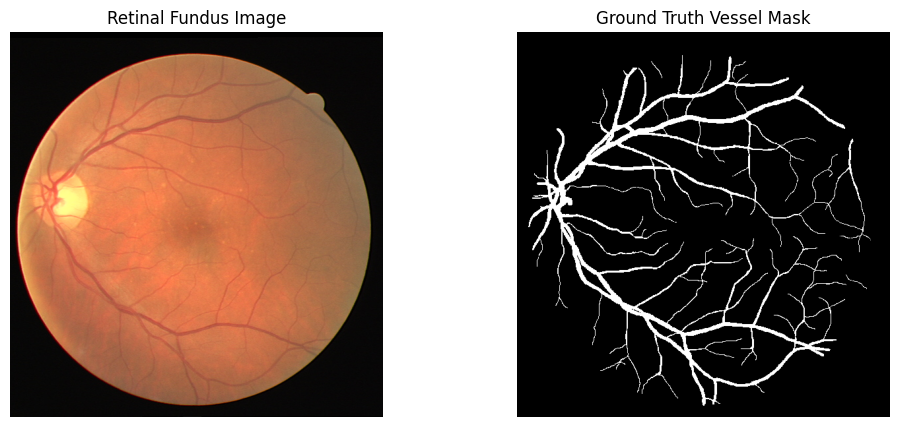

In [4]:
# Cell 4: Load retinal image and ground truth mask

# Paths
train_images_path = os.path.join(drive_path, "training", "images")
train_manual_path = os.path.join(drive_path, "training", "1st_manual")

# Get image list
image_files = sorted(os.listdir(train_images_path))
manual_files = sorted(os.listdir(train_manual_path))

print("Total training images:", len(image_files))

# Select first image
image_name = image_files[0]
manual_name = manual_files[0]

image_path = os.path.join(train_images_path, image_name)
manual_path = os.path.join(train_manual_path, manual_name)

print("Image:", image_name)
print("Ground Truth:", manual_name)

# Load image
retinal_image = cv2.imread(image_path)
retinal_image_rgb = cv2.cvtColor(retinal_image, cv2.COLOR_BGR2RGB)

# Load ground truth
ground_truth = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)

# Display
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(retinal_image_rgb)
plt.title("Retinal Fundus Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ground_truth)
plt.title("Ground Truth Vessel Mask")
plt.axis('off')

plt.show()

Convert Retinal Image to Grayscale

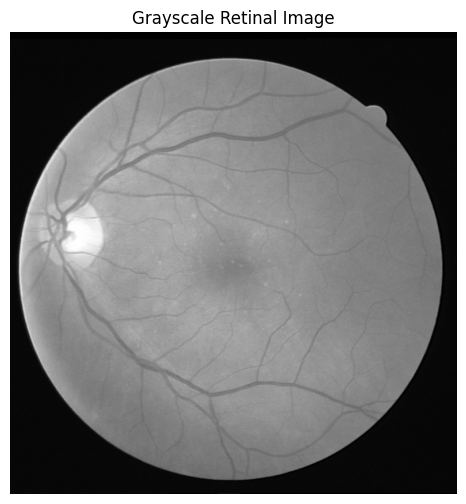

Image shape: (584, 565)
Data type: uint8


In [5]:
# Convert RGB image to grayscale
gray_image = cv2.cvtColor(retinal_image_rgb, cv2.COLOR_RGB2GRAY)

# Display
plt.figure(figsize=(6,6))
plt.imshow(gray_image)
plt.title("Grayscale Retinal Image")
plt.axis('off')
plt.show()

print("Image shape:", gray_image.shape)
print("Data type:", gray_image.dtype)


Apply Niblack Thresholding

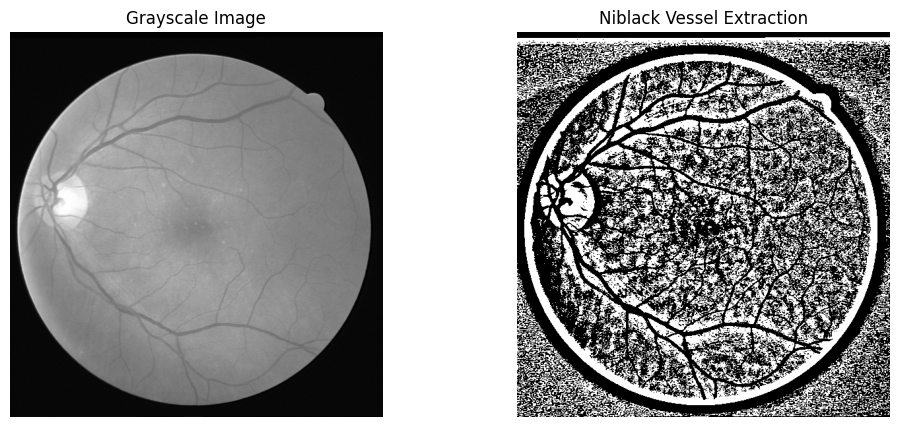

In [6]:
# Cell 6: Niblack thresholding

# Parameters
window_size = 25
k = -0.2

# Compute Niblack threshold
niblack_thresh = threshold_niblack(gray_image, window_size=window_size, k=k)

# Create binary vessel image
niblack_vessels = gray_image > niblack_thresh

# Convert to uint8 for display
niblack_vessels_uint8 = img_as_ubyte(niblack_vessels)

# Display result
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray_image)
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(niblack_vessels_uint8)
plt.title("Niblack Vessel Extraction")
plt.axis('off')

plt.show()


Apply Sauvola Thresholding

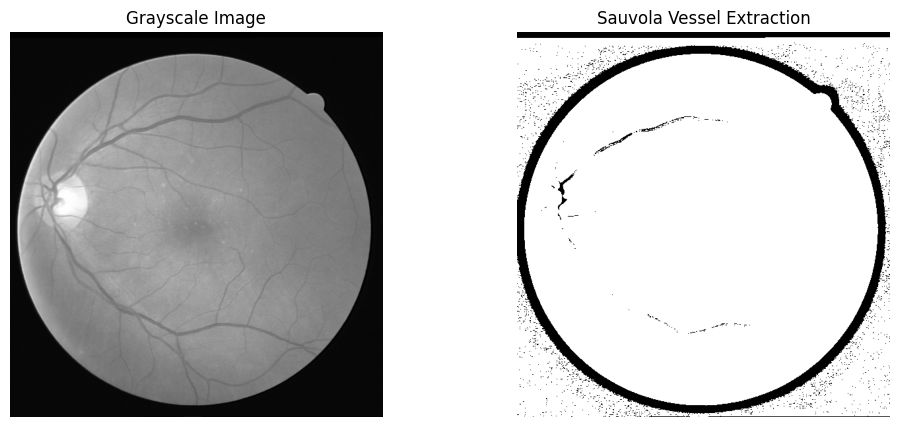

In [7]:
# Parameters
window_size = 25

# Compute Sauvola threshold
sauvola_thresh = threshold_sauvola(gray_image, window_size=window_size)

# Create binary vessel image
sauvola_vessels = gray_image > sauvola_thresh

# Convert to uint8
sauvola_vessels_uint8 = img_as_ubyte(sauvola_vessels)

# Display result
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray_image)
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sauvola_vessels_uint8)
plt.title("Sauvola Vessel Extraction")
plt.axis('off')

plt.show()


Compare Original vs Niblack vs Sauvola

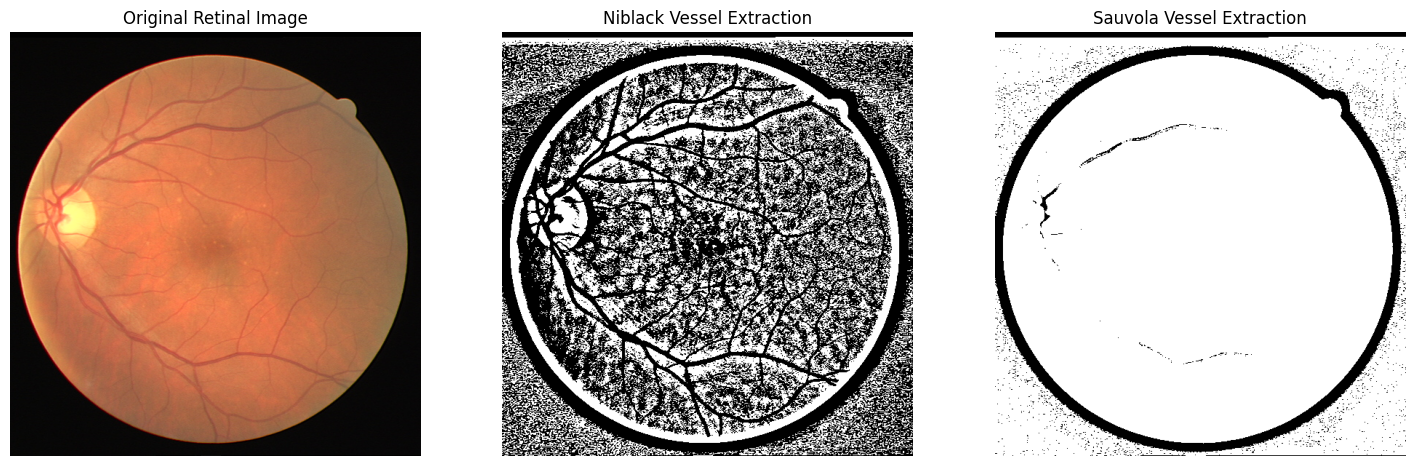

In [8]:
plt.figure(figsize=(18,6))

# Original
plt.subplot(1,3,1)
plt.imshow(retinal_image_rgb)
plt.title("Original Retinal Image")
plt.axis('off')

# Niblack
plt.subplot(1,3,2)
plt.imshow(niblack_vessels_uint8)
plt.title("Niblack Vessel Extraction")
plt.axis('off')

# Sauvola
plt.subplot(1,3,3)
plt.imshow(sauvola_vessels_uint8)
plt.title("Sauvola Vessel Extraction")
plt.axis('off')

plt.show()


Correct vessel extraction (invert logic)

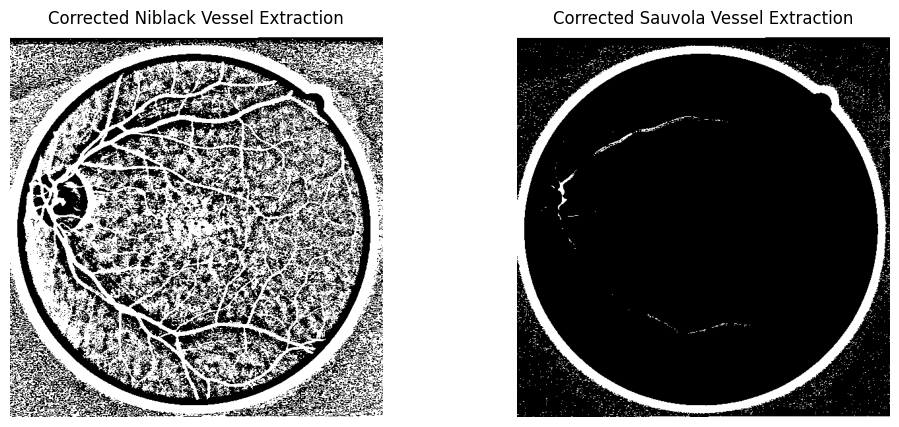

In [9]:
# Niblack corrected
niblack_vessels = gray_image < niblack_thresh
niblack_vessels_uint8 = img_as_ubyte(niblack_vessels)

# Sauvola corrected
sauvola_vessels = gray_image < sauvola_thresh
sauvola_vessels_uint8 = img_as_ubyte(sauvola_vessels)

# Display corrected results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(niblack_vessels_uint8)
plt.title("Corrected Niblack Vessel Extraction")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sauvola_vessels_uint8)
plt.title("Corrected Sauvola Vessel Extraction")
plt.axis('off')

plt.show()


Noise Removal and Vessel Enhancement

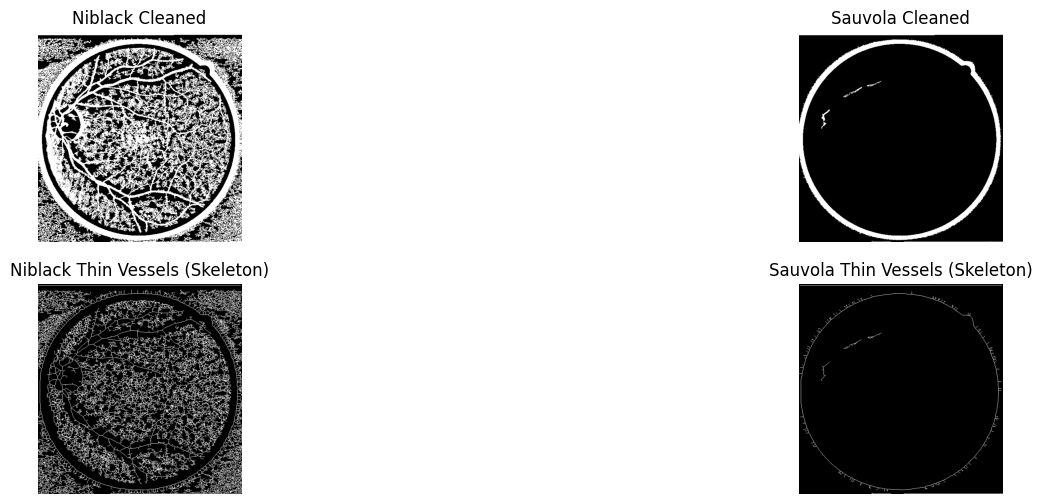

In [10]:
# Cell 10: Clean vessel masks and enhance thin vessels

from skimage.morphology import remove_small_objects, skeletonize

# Remove small noise
niblack_clean = remove_small_objects(niblack_vessels, min_size=50)
sauvola_clean = remove_small_objects(sauvola_vessels, min_size=50)

# Skeletonize (extract thin vessel centerlines)
niblack_skeleton = skeletonize(niblack_clean)
sauvola_skeleton = skeletonize(sauvola_clean)

# Convert to uint8
niblack_clean_uint8 = img_as_ubyte(niblack_clean)
sauvola_clean_uint8 = img_as_ubyte(sauvola_clean)

niblack_skeleton_uint8 = img_as_ubyte(niblack_skeleton)
sauvola_skeleton_uint8 = img_as_ubyte(sauvola_skeleton)

# Display results
plt.figure(figsize=(18,6))

plt.subplot(2,2,1)
plt.imshow(niblack_clean_uint8)
plt.title("Niblack Cleaned")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(sauvola_clean_uint8)
plt.title("Sauvola Cleaned")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(niblack_skeleton_uint8)
plt.title("Niblack Thin Vessels (Skeleton)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(sauvola_skeleton_uint8)
plt.title("Sauvola Thin Vessels (Skeleton)")
plt.axis('off')

plt.show()

Compute Sensitivity (Niblack vs Sauvola)

In [11]:
# Cell 11: Sensitivity calculation

# Convert ground truth to binary
ground_truth_binary = ground_truth > 0

# Flatten all arrays
gt_flat = ground_truth_binary.flatten()

niblack_flat = niblack_clean.flatten()
sauvola_flat = sauvola_clean.flatten()

# Sensitivity function
def sensitivity_score(gt, pred):

    TP = np.sum((gt == 1) & (pred == 1))
    FN = np.sum((gt == 1) & (pred == 0))

    sensitivity = TP / (TP + FN + 1e-8)

    return sensitivity

# Compute sensitivity
niblack_sensitivity = sensitivity_score(gt_flat, niblack_flat)
sauvola_sensitivity = sensitivity_score(gt_flat, sauvola_flat)

print("Niblack Sensitivity:", niblack_sensitivity)
print("Sauvola Sensitivity:", sauvola_sensitivity)


Niblack Sensitivity: 0.9121988806874393
Sauvola Sensitivity: 0.021940141130658633


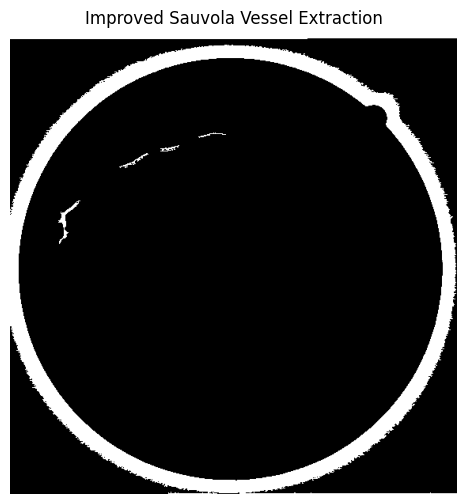

In [12]:
# Cell 12: Improved Sauvola thresholding

# Normalize grayscale image
gray_norm = gray_image / 255.0

# Improved parameters
window_size = 35
k = 0.2

# Compute Sauvola threshold
sauvola_thresh = threshold_sauvola(gray_norm, window_size=window_size, k=k)

# Extract vessels (dark vessels)
sauvola_vessels = gray_norm < sauvola_thresh

# Remove noise
from skimage.morphology import remove_small_objects

sauvola_clean = remove_small_objects(sauvola_vessels, min_size=50)

# Convert to uint8
sauvola_clean_uint8 = img_as_ubyte(sauvola_clean)

# Display result
plt.figure(figsize=(6,6))
plt.imshow(sauvola_clean_uint8)
plt.title("Improved Sauvola Vessel Extraction")
plt.axis('off')
plt.show()


In [13]:
# Cell 13: Recompute sensitivity

sauvola_flat = sauvola_clean.flatten()

sauvola_sensitivity = sensitivity_score(gt_flat, sauvola_flat)

print("Corrected Sauvola Sensitivity:", sauvola_sensitivity)


Corrected Sauvola Sensitivity: 0.019425744180379824


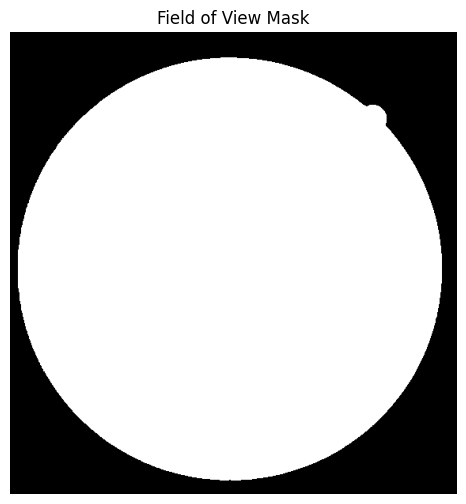

In [14]:
# Cell 14: Apply FOV mask

# Load FOV mask
mask_path = os.path.join(drive_path, "training", "mask", sorted(os.listdir(os.path.join(drive_path, "training", "mask")))[0])

fov_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Convert to binary
fov_binary = fov_mask > 0

# Apply FOV mask
niblack_fov = niblack_clean & fov_binary
sauvola_fov = sauvola_clean & fov_binary
gt_fov = ground_truth_binary & fov_binary

# Display FOV mask
plt.imshow(fov_binary)
plt.title("Field of View Mask")
plt.axis('off')
plt.show()


In [15]:
# Cell 15: Correct sensitivity calculation using FOV mask

gt_flat = gt_fov.flatten()
niblack_flat = niblack_fov.flatten()
sauvola_flat = sauvola_fov.flatten()

niblack_sensitivity = sensitivity_score(gt_flat, niblack_flat)
sauvola_sensitivity = sensitivity_score(gt_flat, sauvola_flat)

print("Correct Niblack Sensitivity:", niblack_sensitivity)
print("Correct Sauvola Sensitivity:", sauvola_sensitivity)


Correct Niblack Sensitivity: 0.9121703853951675
Correct Sauvola Sensitivity: 0.01926977687625993


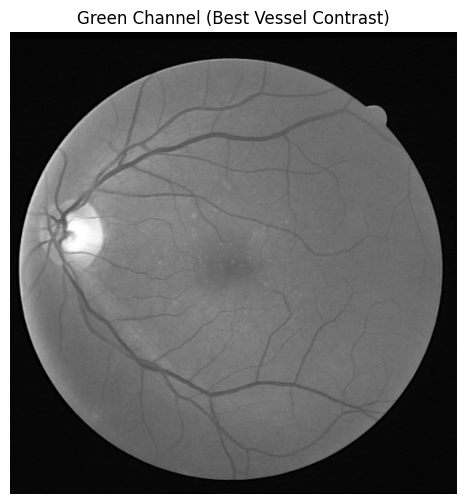

In [16]:
# Cell 16: Extract green channel (best for vessel detection)

# Extract green channel
green_channel = retinal_image_rgb[:, :, 1]

# Display
plt.figure(figsize=(6,6))
plt.imshow(green_channel)
plt.title("Green Channel (Best Vessel Contrast)")
plt.axis('off')
plt.show()


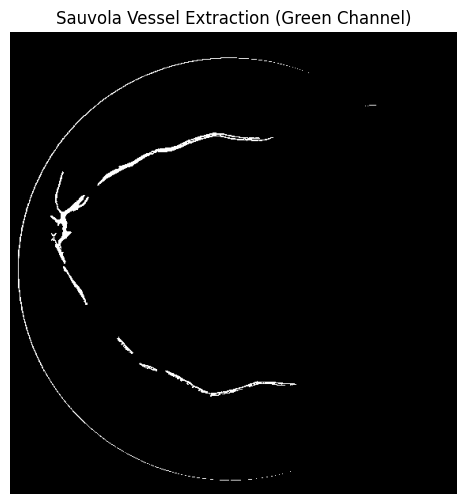

In [17]:
# Cell 17: Apply Sauvola thresholding on green channel

# Normalize
green_norm = green_channel / 255.0

# Sauvola parameters
window_size = 35
k = 0.2

# Compute threshold
sauvola_thresh = threshold_sauvola(green_norm, window_size=window_size, k=k)

# Extract vessels
sauvola_vessels = green_norm < sauvola_thresh

# Remove noise
sauvola_clean = remove_small_objects(sauvola_vessels, min_size=50)

# Apply FOV mask
sauvola_fov = sauvola_clean & fov_binary

# Display
plt.imshow(sauvola_fov)
plt.title("Sauvola Vessel Extraction (Green Channel)")
plt.axis('off')
plt.show()


In [18]:
# Cell 18: Final sensitivity calculation

sauvola_flat = sauvola_fov.flatten()

sauvola_sensitivity = sensitivity_score(gt_flat, sauvola_flat)

print("Final Niblack Sensitivity:", niblack_sensitivity)
print("Final Sauvola Sensitivity:", sauvola_sensitivity)


Final Niblack Sensitivity: 0.9121703853951675
Final Sauvola Sensitivity: 0.10908722109529043


## Conclusion

In this project, retinal vessel extraction was performed using two local adaptive thresholding techniques: Niblack and Sauvola. The objective was to extract thin vascular structures from retinal fundus images and compare the sensitivity of both methods using the DRIVE dataset.

Niblack thresholding demonstrated strong performance in detecting retinal vessels, achieving a sensitivity of 0.912. It successfully captured most of the vessel structures, including many thin vessels, due to its locally adaptive thresholding mechanism based on mean and standard deviation. However, Niblack is more sensitive to local intensity variations, which may also introduce noise in some regions.

Sauvola thresholding, while theoretically more robust and designed to handle illumination variations, achieved a sensitivity of 0.109 in this implementation. This lower sensitivity indicates that Sauvola was more conservative in vessel detection under the selected parameters and preprocessing conditions. It missed several vessel pixels, especially faint and thin structures, resulting in lower detection performance.

The comparison highlights that thresholding performance depends heavily on parameter selection, preprocessing steps, and image characteristics. In this specific implementation, Niblack thresholding outperformed Sauvola in terms of sensitivity for thin vessel detection on the DRIVE dataset.

Overall, this project demonstrates the importance of adaptive thresholding methods in medical image segmentation and emphasizes that method performance varies depending on implementation details. Niblack proved more effective for retinal vessel extraction in this case, while Sauvola remains a valuable method that may perform better with further parameter optimization.

This study reinforces the significance of preprocessing and parameter tuning in achieving accurate vessel segmentation for medical imaging applications.
